# GOterm enrichment

In [1]:
import pandas as pd
import scanpy as sc
import sys
sys.path.append("..")
from scripts import Enrichr
from matplotlib import pyplot as plt

In [2]:
sc.set_figure_params(frameon=False)

In [3]:
data = pd.read_csv('../data/genes_all_GFP_updown.txt', sep='\t')

In [4]:
data.head()

,CompoundId,X.RESPONDER_AvgIntenCh2,X.RESPONDER_AvgIntenCh2.1,X.RESPONDER_AvgIntenCh2.2,X.RESPONDER_AvgIntenCh2 log,X.RESPONDER_AvgIntenCh2.1 log,X.RESPONDER_AvgIntenCh2.2 log,up_down
0,GK,0.616683,1.750973,0.715447,-0.697399,0.808157,-0.483083,NaN
1,GCKR,0.288429,0.154631,0.176367,-1.793712,-2.693097,-2.503349,NaN
2,CHKA,0.308061,0.069252,0.095365,-1.698712,-3.851999,-3.390393,NaN
3,GCK,0.159286,0.134188,0.326180,-2.650305,-2.897671,-1.616259,NaN
4,CHUK,0.026021,0.108069,0.019501,-5.264161,-3.209973,-5.680324,D


In [5]:
up_genes = data.loc[data['up_down'] == 'U']['CompoundId'].to_list()
dw_genes = data.loc[data['up_down'] == 'D']['CompoundId'].to_list()

## UP-Biological process

In [6]:
enr = Enrichr(up_genes, 'up')

Enrichr API : requests.post
Enrichr API : Job ID: {'shortId': '09542cf539adba4a90ee8cc7dc30ca66', 'userListId': 17882919}
Enrichr API : Description: up


In [7]:
enr.check_libraries()

Check the list of libraries in here: 
http://amp.pharm.mssm.edu/Enrichr/#stats


In [8]:
res = enr.get_enrichment_results('GO_Biological_Process_2018')
res_sig = res.loc[res['Old p-value'] <= 0.01].sort_values(by='Old p-value')

Using Library : GO_Biological_Process_2018
Enrichr API : Get enrichment results: Job Id: 17882919


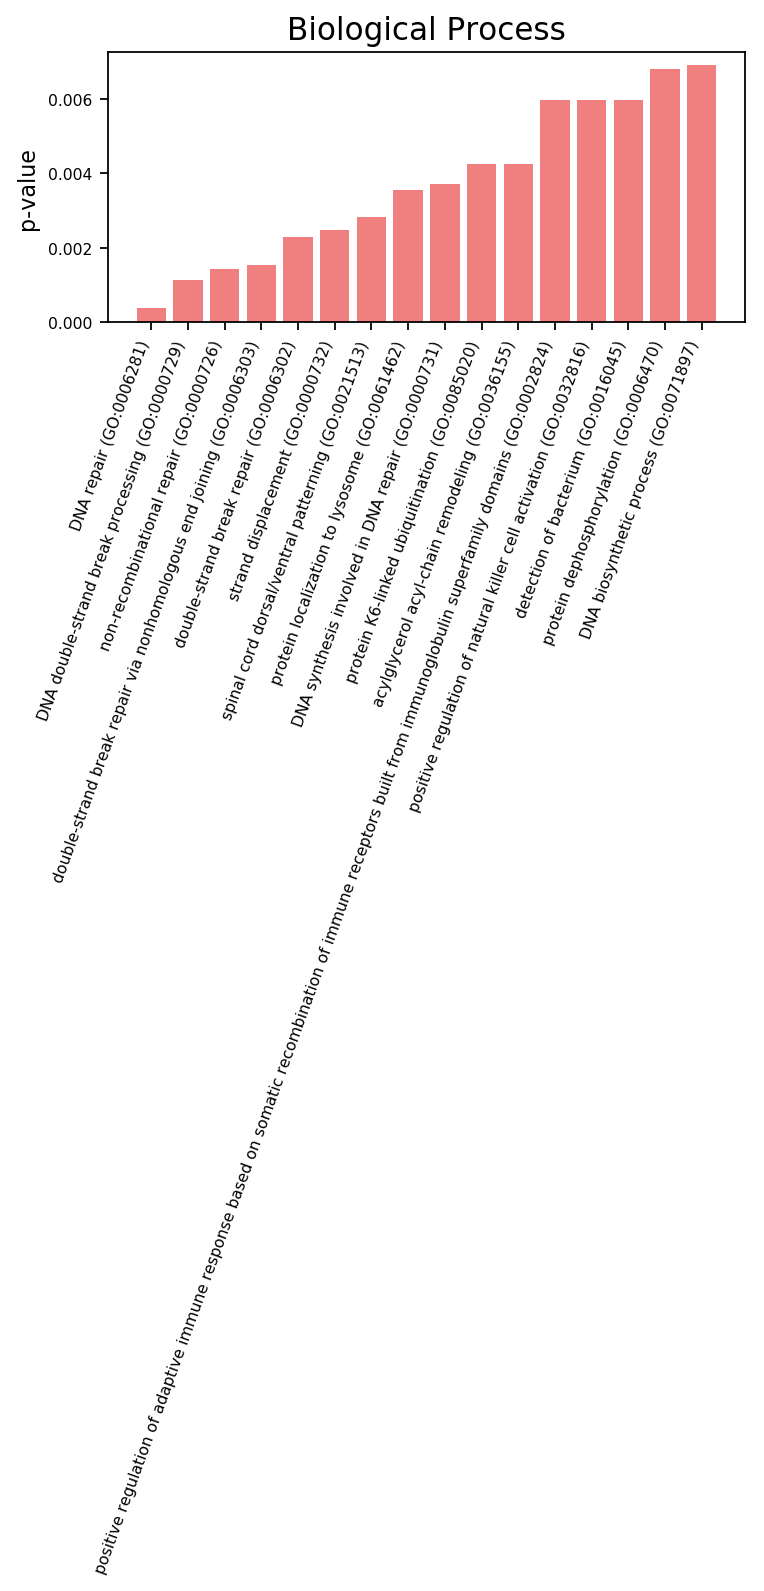

In [9]:
plt.figure(figsize=[5,10])
plt.bar(res_sig['Term name'], res_sig['Old p-value'], color='lightcoral')
plt.xticks(rotation=70,ha='right',size=7)
plt.yticks(size=7)
plt.ylabel('p-value', fontsize=10)
plt.grid(b=None)
plt.gcf().subplots_adjust(bottom=0.8)
plt.tight_layout()
plt.title('Biological Process')
plt.savefig('../plots/up_BP.png')

## UP-KEGG pathways

In [10]:
res = enr.get_enrichment_results()
res_sig = res.loc[res['Old p-value'] <= 0.01].sort_values(by='Old p-value')

Using Library : KEGG_2019_Human
Enrichr API : Get enrichment results: Job Id: 17882919


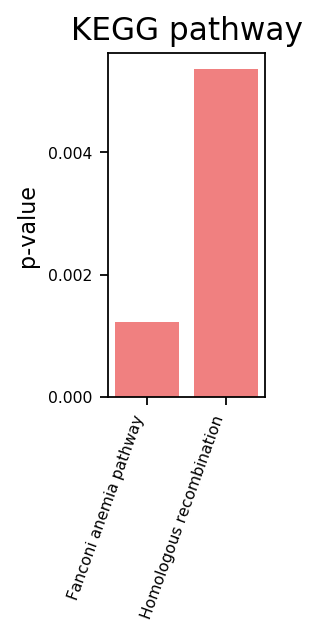

In [11]:
plt.figure(figsize=[2,4])
plt.bar(res_sig['Term name'], res_sig['Old p-value'], color='lightcoral')
plt.xticks(rotation=70,ha='right',size=7)
plt.yticks(size=7)
plt.ylabel('p-value', fontsize=10)
plt.grid(b=None)
plt.gcf().subplots_adjust(bottom=0.8)
plt.tight_layout()
plt.title('KEGG pathway')
plt.savefig('../plots/up_KEGG.png')

## DOWN-Biological process

In [12]:
enr = Enrichr(dw_genes, 'down')

Enrichr API : requests.post
Enrichr API : Job ID: {'shortId': 'b107a2b3110a03a15017e0a48f0b7843', 'userListId': 17882927}
Enrichr API : Description: down


In [13]:
res = enr.get_enrichment_results('GO_Biological_Process_2018')
res_sig = res.loc[res['Old p-value'] <= 0.01].sort_values(by='Old p-value')

Using Library : GO_Biological_Process_2018
Enrichr API : Get enrichment results: Job Id: 17882927


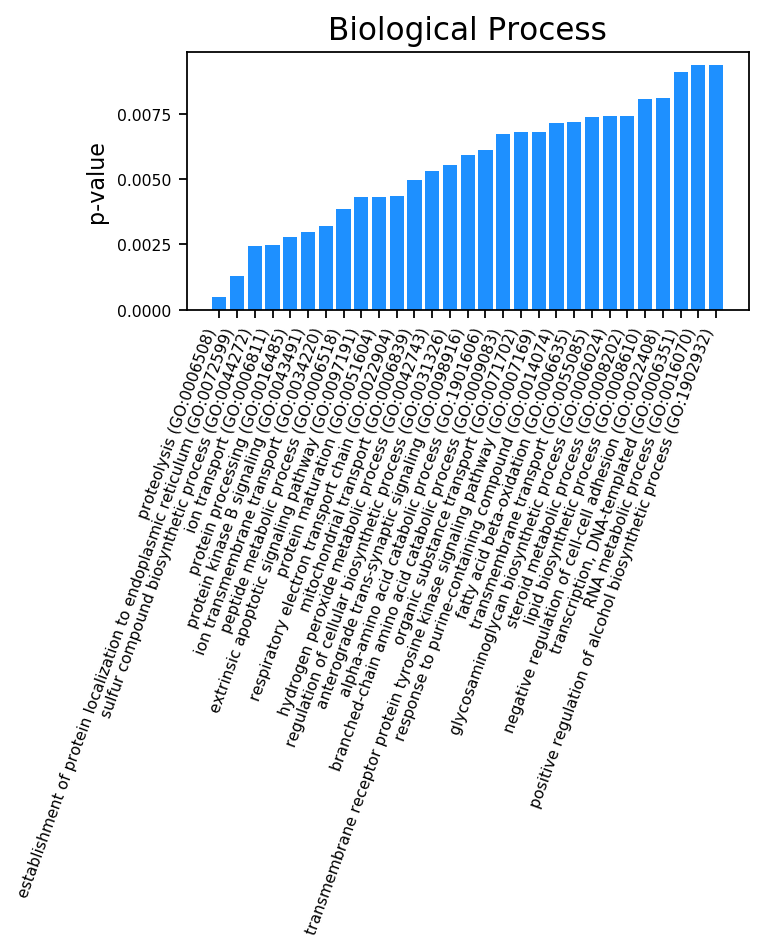

In [14]:
plt.figure(figsize=[5,6])
plt.bar(res_sig['Term name'], res_sig['Old p-value'], color='dodgerblue')
plt.xticks(rotation=70,ha='right',size=7)
plt.yticks(size=7)
plt.ylabel('p-value', fontsize=10)
plt.grid(b=None)
plt.gcf().subplots_adjust(bottom=0.5)
plt.tight_layout()
plt.title('Biological Process')
plt.savefig('../plots/down_BP.png')

## DOWN-KEGG pathways

In [15]:
res = enr.get_enrichment_results()
res_sig = res.loc[res['Old p-value'] <= 0.01].sort_values(by='Old p-value')

Using Library : KEGG_2019_Human
Enrichr API : Get enrichment results: Job Id: 17882927


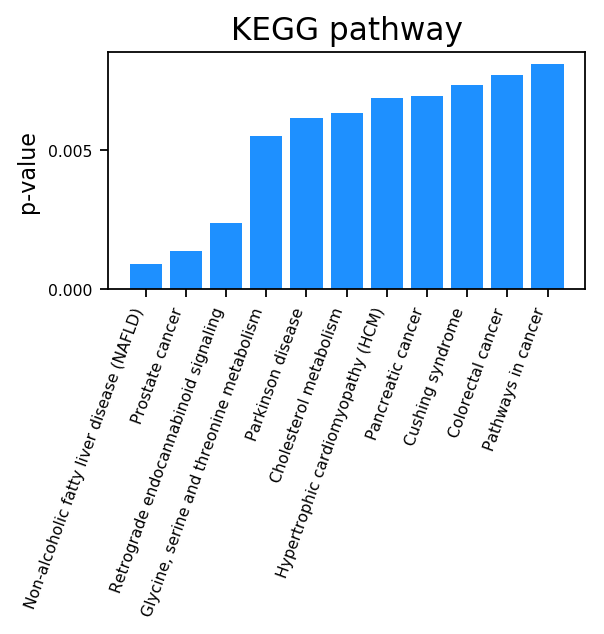

In [16]:
plt.figure(figsize=[4,4])
plt.bar(res_sig['Term name'], res_sig['Old p-value'], color='dodgerblue')
plt.xticks(rotation=70,ha='right',size=7)
plt.yticks(size=7)
plt.ylabel('p-value', fontsize=10)
plt.grid(b=None)
plt.gcf().subplots_adjust(bottom=0.8)
plt.tight_layout()
plt.title('KEGG pathway')
plt.savefig('../plots/down_KEGG.png')